In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
import grading_tools

# Exercises

## Exercise

Write a function `central_difference_error` which computes the size of error of the central difference scheme for solving the ODE
$$
\frac{dy}{dt} = \lambda y_t
$$
with initial conidition $y_0$
on the interval $[0,1]$ with $n$ steps. The error is defined to be the distance between the true value at time $1$ and the approximation
at time $1$.
Generate a plot that shows the error is of order $O(n^{-2})$ when $\lambda=-1$.

-2.0006316641849673


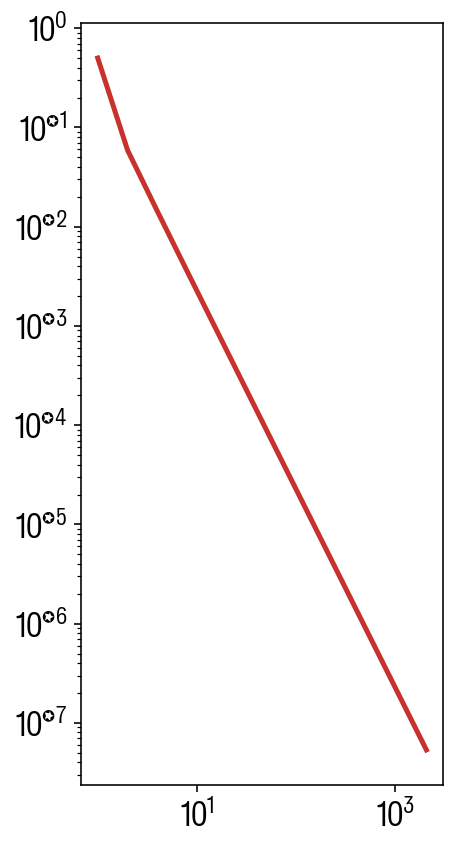

In [2]:
def central_difference_error( y0, lbda, n ):
    ### BEGIN SOLUTION
    dt = 1/n
    t = np.linspace(0,1, n+1)
    y = np.zeros(n+1)
    y[0] = y0
    for i in range(0,n):
        y[i+1] = (1+0.5*lbda*dt)/(1-0.5*lbda*dt) * y[i]
    error = abs( y[-1] - np.exp(lbda)*y0)
    return error
    ### END SOLUTION

### BEGIN SOLUTION
lbda = -3
n_pts = 12
n_vals = np.zeros(n_pts)
errors = np.zeros(n_pts)
y0 = 2

for i in range(0,n_pts):
    n = 2**i
    n_vals[i] = n
    errors[i] = central_difference_error( y0, lbda, n )
plt.loglog(n_vals,errors)
plt.gca().set_aspect('equal')

gradient = (log(errors[11])-log(errors[3]))/(log(n_vals[11])-log(n_vals[3]))
print( gradient )

# The gradient of the plot is $-2$, demonstrating that the error is of $O(n^{-2})$.

### END SOLUTION

In [3]:
error = central_difference_error(2, -3, 12)
grading_tools.check('60895a', error)
grading_tools.auto_marking_message()

Auto marking message: 😺 Correct


## Exercise

Prove that if $\lambda\leq 0$, the central difference scheme is stable for all values of $\delta t$.

### Solution

By induction

$$y_{n \delta t}=\left( \frac{1+\tfrac{1}{2}\lambda \delta t}{1-\tfrac{1}{2}\lambda \delta t} \right)^n y_0$$

So the scheme is stable if and only if 
$$
\frac{1+\tfrac{1}{2}\lambda \delta t}{1-\tfrac{1}{2}\lambda \delta t} \leq 1
$$
If $\lambda<0$, the denominator is positive, so we may rearrange to find that the scheme will be stable if
$$1+\tfrac{1}{2}\lambda \delta t \leq 1-\tfrac{1}{2}\lambda \delta t$$
Which simplifies to requiring $\lambda \delta t<0$. This will always be satisfied since $\lambda<0$ and $\delta t>0$.
